## Plot Significant Clusters

Use t-score maps and plot them

In [ ]:
import os
import glob
from nilearn import plotting
import nibabel as nib
from nilearn.plotting import find_xyz_cut_coords

# Define the template for plotting
template_path = "/my/path/fMRIData/masks/mni152_0-737mm_plotting.nii.gz"

# Base directory containing all effect group folders
base_dir = '/my/path/fMRIData/2ndlevel_glm/3dMVM/clusterized_results_0-001'

# Use glob to find all T score map files in subdirectories
t_score_files = glob.glob(os.path.join(base_dir, '*', '*_Tscoremap.nii.gz'))

# Loop through each T score map file and plot it
for t_file in t_score_files:
    print("Plotting:", t_file)
    
    # Load the T score map
    stat_map_img = nib.load(t_file)
    
    # Extract the specific sub-brick (adjust indexing if needed)
    stat_map_img_3d = stat_map_img.slicer[..., 0, 9]
    
    # Get the data to compute the intensity range
    data = stat_map_img_3d.get_fdata()
    vmin, vmax = data.min(), data.max()
    abs_max = max(abs(vmin), abs(vmax))
    
    # Compute optimal cut coordinates automatically
    coords = find_xyz_cut_coords(stat_map_img_3d)
    
    # Plot the map
    display = plotting.plot_stat_map(
        stat_map_img_3d,
        bg_img=template_path,
        threshold=0.000,
        display_mode='ortho',
        cut_coords=coords,
        black_bg=False,
        cmap='seismic',
        draw_cross=False,
        vmin=-abs_max,
        vmax=abs_max
    )
    
    # Show the plot (this will pop up a new window for each map)
    plotting.show()


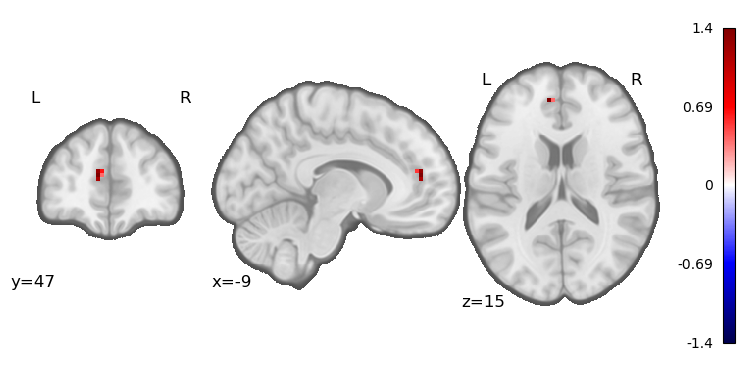

In [4]:
from nilearn import plotting
from nilearn.plotting import find_xyz_cut_coords

# Compute the optimal coordinates automatically
coords = find_xyz_cut_coords(stat_map_img_3d)

# Use these coordinates in your plot
plotting.plot_stat_map(stat_map_img_3d, bg_img=template_path, threshold=0.000,
                       display_mode='ortho', cut_coords=coords, black_bg=False, 
                       cmap='seismic', draw_cross=False,
                       vmin=-abs_max, vmax=abs_max)
plotting.show()
